<br>

<center> <strong> <font face="Courier New" size=5> Reinforcement Learning </font> </strong> </center>
<br>
<center>  <strong> <font face="Courier New" size=6 color='#2E86C1'> Multi Armed Bandits - Taller 1</font> </strong> </center>

<br>
<center> <p> Docente: Fernando Enrique Lozano Martinez </p>
 <p> 
 Estudiantes: <br>
 Manuela Viviana Chacón Chamorro <br>
 Juan Ivan Cubillos Garay </p>
</center>

<br> 
<p> IELE <br> 
Facultad de Ingeniería <br>
Universidad de los Andes <br>
2023
</p>

---

# Introducción

<p align="justify">
El problema Multi-armed Bandit corresponde a un escenario en el cual se cuenta con un conjunto de $K$ opciones finitas y limitadas. La elección de una opción, denominada acción, genera una recompensa $r$, valor que corresponde a la realización de una variable aleatoria que sigue una distribución de probabilidad que depende del ambiente escogido y la cual se desconoce. En este problema se tiene un número limitado de acciones secuenciales que se pueden ejecutar (iteraciones) y el objetivo es seleccionar la opción que maximice el valor esperado de $R$. 

<p align="justify">
Este problema se puede pensar como una máquina tragamonedas (bandit) con muchas palancas y un jugador que debe encontrar cuál palanca debe accionar para maximizar el valor esperado de su ganancia, teniendo en cuenta que solo puede accionar las palancas un número limitado de veces. Este escenario es ilustrativo, no obstante el problema tiene aplicación en diversos campos. Por ejemplo, en el sector industrial al considerar la elección entre diferentes tipos de procesos que maximicen rendimientos o minimicen costos. En el sector financiero este problema se presenta en la selección de portafolios de inversión que maximicen el rendimiento o disminuyan el riesgo financiero. En general es aplicable a cualquier situación que involucre el diseño de experimentos y se deba elegir entre varias opciones. En el contexto de aprendizaje por refuerzo, el problema Multi-armed Bandits se usa para analizar el dilema entre explotación y exploración. 

<p align="justify">
Una forma de abordar este problema son los métodos de valor de acción. En general, en estas técnicas se busca establecer, con la información observada, un estimativo del valor esperado de la recompensa dada la acción y con estos resultados elegir acciones que maximicen la recompensa. En los métodos se incluyen aspectos que además de maximizar la recompensa busquen fortalecer la exploración de otras acciones. Algunos de estos métodos son selección $\epsilon$-greddy, UCB y Gradient Bandit. Este último no usa directamente estimativos del valor esperado, sino relaciones de preferencia entre acciones. 

<p align="justify">
En este taller se considera el problema Multi-armed Bandits para tres escenarios, representados en el dibujo de la Figura 1, cada escenario condiciona las distribuciones de probabilidad de las recompensas. Para cada escenario se implementan los métodos $\epsilon$-greddy, UCB y Gradient Bandit. En la primera parte de este cuaderno se incluye una breve explicación teórica de los métodos y su implementación computacional en funciones. A continuación, por cada escenario se prueban los tres métodos con variaciones de hiper-parámetros y se presentan algunas conclusiones.


<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=19R5KiSXYkv8vBK-3z60c5aLV4sSDJC62" width="600"/>
</div>
</center>






## Consideraciones de implementación: 
<p align="justify">
Los algoritmos desarrollados tardan aproximadamente de 1 - 2 minutos en completar 1000 iteraciones y repetir el proceso con 2000 episodios. Por esta razón para métodos con sintonización de hiper-parámetros que realizan la implementación de hasta 25 métodos de solución se requieren entre 25 y 50 minutos para culminar la ejecución. 

In [ ]:
# Activar acceso a google drive 
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/MyDrive/RL/ # Se debe cambiar a la ubicación de trabajo donde se encuentre el archivo envs.pyc

Mounted at /content/drive/
/content/drive/MyDrive/RL


In [ ]:
# Importar liberias 

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar clase para realizar la simulación de los ambientes multi-bandits
import imp
my_module = imp.load_compiled("envs", "envs.pyc")
BanditEnvs= my_module.BanditEnvs

# Configuración general de gráficas 
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Semilla para los aleatorios 
np.random.seed(2023) 

# Métodos de valor de acción




## Método 1. Valor de acción con selección $\epsilon$−Greedy
<p align="justify">
En este método se realiza un estimativo de la función $q_{\star}(a)$, la función estimada se denotará como $Q(a)$. La estimación se realiza de acuerdo con las recompensas observadas cuando se toma una determinada acción. Inicialmente se comienza con valores aleatorios, ceros o algún número particular de $Q(a)$, la inicialización es necesaria para elegir la primera acción. A continuación, se estima la función $Q_t(a)$ con el promedio de las recompensas vistas para esta acción hasta el instante $t-1$, es decir, la suma de las recompensas elegidas al tomar la acción $a$ dividida entre el número de veces que realizó $a$. Matemáticamente la forma de estimar $Q_t(a)$ puede formular como:

$$Q_t(a) = \begin{cases}
      \frac{\sum_{i=1}^{t-1} R_ia}{n(a)} & \text{Si } a \in \mathcal{A}_T \\
        v_0 & \text{Si} \ a \notin \mathcal{A}_T
         \end{cases} 
$$
<p align="justify">
donde $\mathcal{A}_T$ denota las acciones que han sido tomadas a lo largo de los $t$ pasos, $n(a)$ el número de veces que la acción $a$ ha sido tomada, $R_ia$ las recompensas que han sido tomadas en el proceso solo cuando $a$ fue seleccionada. 
<p align="justify">
El estimativo $Q_t(a)$ se usa para encontrar la mejor acción en una determinada iteración $t$. La mejor opción en el momento $t$ es el $a_g = \arg \max_a Q_t(a)$, sin embargo esta selección puede sesgar al algoritmo a no explorar otras acciones. Una solución para motivar la selección de otras acciones es dotar de una probabilidad $\mathcal{P}[A_t = a]$, definida como:

$$\mathcal{P}[A_t = a] = \begin{cases}
      1- \epsilon + \frac{\epsilon}{k} & \text{Si } a = a_g\\
      \frac{\epsilon}{k} & \text{Si} \ a \not = a_g 
                        \end{cases}
$$

<p align="justify">
Esto implica que cada acción disponible tiene una probabilidad de ser elegida que se relaciona con el valor $\epsilon$ y la acción óptima. 

### Hiper-parámetro $\epsilon$
<p align="justify">
El valor de $\epsilon$ debe encontrarse en $\epsilon \in [0,1]$, entre más cercano sea a 0 mayor es la probabilidad de la acción $a_g$, por otra parte, si el valor tiende a 1 se fortalece una selección aleatoria. Este valor se considera un *hiper-parámetro* del método, una estrategia para su ajuste es emplear técnicas de prueba-error para establecer un valor que mejore el desempeño del método. 

### Caso no estático 
<p align="justify">
El método planteado se adapta a método estáticos en los cuales las distribuciones de probabilidad de cada bandit son fijas, por lo que este método emplea como estimativos de $Q(a)$ toda la información del proceso.Sin embargo, en el escenario no estáticos no es recomendable emplear todas las observaciones y se propone generar estimativos $Q(a)$ que se relacionen de forma exponencial decreciente con la historia de las recompensas. En este caso la forma de estimar $Q(a)$ se realiza con un factor denotado $\alpha \in (0,1]$, de acuerdo con la ecuación 

$$Q_{t+1}(a) = Q_{t}(a) + \alpha [R_t - Q_t(a)].$$

La cual también puede ser interpretada como:

$$Q_{t+1}(a) = \alpha R_t + (1-\alpha) Q_t(a).$$

Un valor de $\alpha$ cercano a la unidad implica tener en cuenta las observaciones de recompensa actuales y despreciar el historio.  Por otra parte, valores cercanos a cero implican considerar el historial completo de los estimativos de $Q(a)$.


---
<p align="justify">
La siguiente función implementa el método $\epsilon$-greedy y deja como parámetros el valor de $\epsilon$, el número de episodios, el número de iteraciones en cada uno, y el número de acciones disponibles. Además la función permite configurar el modo estático o incluir un factor $\alpha$ para el modo no estático. 

In [ ]:
def eGreedyMethod(epsilon, banditEnvs, banditScenery, 
                  numberSteps, numberEpisodics, numberActions, 
                  estaticFactor = -1):
  # Función que calcula las recompensas promedio luego de usar el método e-greedy para 
  # buscar la mejor acción posible en el problema de multi-bandits. 
  # Los resultados se realizan para varios episodios (numberEpisodics) 
  # en cada episodio se realizan un número de iteraciones o pasos (numberSteps)

  # Parámetros:
  # epsilon: factor del método e-greedy
  # banditEvns: clase que simula el problema de multi-bands
  # banditScenery: elección del escenario del problema 1, 2, 3
  # numberSteps: número de iteraciones en cada episodio
  # numberEpisodics: número de episodios
  # numberActions: número de acciones disponibles para tomar
  # estaticFactor: indica al algoritmo si se quiere trabajar de forma estatica (-1) o no, 
  #                en el último caso se debe incluir un número entre 0 y 1 para ser **

  # Salidas:
  # rewardsMean: promedio de las recompensas en cada iteración para el total de episodios
  # meanCountActions: promedio del número de acciones tomadas en cada episodio

  
  actionsAvaliable = range(numberActions)
  rewardsMean = np.zeros((numberSteps,))
  meanCountActions = np.zeros((numberActions,))

  for j in range(numberEpisodics):
    Q = np.zeros((numberActions))
    rewards = []
    actionsTaken = []
    for i in range(numberSteps):
      actionGreedy = np.argmax(Q)
      probabilitiesAction = (epsilon/numberActions)*np.ones((numberActions))
      probabilitiesAction[actionGreedy] = 1-epsilon + (epsilon/numberActions)
      action = random.choices(actionsAvaliable, weights=probabilitiesAction, k=1)[0]
      actionsTaken.append(action)
      if banditScenery == 1: reward = banditEnvs.run_env_1(action)
      if banditScenery == 2: reward = banditEnvs.run_env_2(action)
      if banditScenery == 3: reward = banditEnvs.run_env_3(action)
      rewards.append(reward)
      if estaticFactor == -1:
        Q[action] += (1/actionsTaken.count(action))*(reward - Q[action])
      elif 0 <= estaticFactor and estaticFactor <= 1:
        Q[action] += (estaticFactor)*(reward - Q[action])
      else:
        print('Ingreso un valor invalido para estaticFactor')
        print('\nIngrese un número entre 0 y 1, o indique -1 para método estatico')
    rewardsMean = rewardsMean + (1/(j+1))* (rewards - rewardsMean)
    countActions  = np.bincount(actionsTaken, minlength=numberActions)
    meanCountActions = meanCountActions + (1/(j+1))*(countActions-meanCountActions)
    banditEnvs.reset()
  return rewardsMean, meanCountActions*100/numberSteps

## Método 2. Upper Confidence Bound (UCB)

<p align="justify">
En este método la selección de la acción se realiza a través de la regla 

$$A_t = \arg \max_a \left[ Q_t(a) + c\sqrt{\frac{\ln(t)}{N_t(a)}} \ \right],$$
<p align="justify">
donde $Q_t(a)$ representa el estimativo $q_t(a)$ para la acción $a$, definido de igual manera que en el método anterior. El máximo de $Q_t(a)$ implica elegir la acción greedy, sin embargo, el siguiente término $c\sqrt{\frac{\ln(t)}{N_t(a)}}$ penaliza las acciones que más se han escogido, promoviendo acciones que carecen de estimativos. El valor $c$ es un hiper-parámetro del algoritmo y se encarga de ponderar la importancia de fomentar la búsqueda de estimativos cercanos a la acción greedy con bajas observaciones, si $c=0$ entonces se elegiría la acción greedy. 

A continuación se indica la función de implementación de este método.


---
<p align="justify">
La siguiente función implementa el método UCB y considera como parámetros el valor de $c$, el número de episodios, el número de iteraciones en cada uno, y el número de acciones disponibles. Además la función permite configurar el modo estático o incluir un factor $\alpha$ para el modo no estático. 

In [ ]:
def UCBMethod(c, banditEnvs, banditScenery, 
              numberSteps, numberEpisodics, numberActions, 
              estaticFactor = -1):
  # Función que calcula las recompensas promedio luego de usar el método UCB para 
  # buscar la mejor acción posible en el problema de multi-bandits. 
  # Los resultados se realizan para varios episodios (numberEpisodics) 
  # en cada episodio se realizan un número de iteraciones o pasos (numberSteps)

  # Parámetros:
  # c: factor del método UCB para ponderar el coeficiente sqrt(ln(t)/Nt(a))
  # banditEvns: clase que simula el problema de multi-bands
  # banditScenery: elección del escenario del problema 1, 2, 3
  # numberSteps: número de iteraciones en cada episodio
  # numberEpisodics: número de episodios
  # numberActions: número de acciones disponibles para tomar
  # estaticFactor: indica al algoritmo si se quiere trabajar de forma estatica (-1) o no, 
  #                en el último caso se debe incluir un número entre 0 y 1.

  # Salidas:
  # rewardsMean: promedio de las recompensas en cada iteración para el total de episodios
  # meanCountActions: % promedio del número de acciones tomadas en cada episodio
  
  actionsAvaliable = range(numberActions)
  rewardsMean = np.zeros((numberSteps,))
  meanCountActions = np.zeros((numberActions,))

  for j in range(numberEpisodics):
    Q = np.zeros((numberActions))
    rewards = []
    actionsTaken = []
    ucbAction = np.zeros((numberActions,))
    action = random.choices(actionsAvaliable,k=1)[0] # Inicialización primera accion
    for i in range(numberSteps):
      actionsTaken.append(action)
      actionGreedy = np.argmax(Q)
      if banditScenery == 1: reward = banditEnvs.run_env_1(action)
      if banditScenery == 2: reward = banditEnvs.run_env_2(action)
      if banditScenery == 3: reward = banditEnvs.run_env_3(action)
      rewards.append(reward)
      if estaticFactor == -1:
        Q[action] += (1/actionsTaken.count(action))*(reward - Q[action])
      elif 0 <= estaticFactor and estaticFactor <= 1:
        Q[action] += (estaticFactor)*(reward - Q[action])
      else:
        print('Ingreso un valor invalido para estaticFactor')
        print('\nIngrese un número entre 0 y 1, o indique -1 para método estatico')
      ucbAction[action] = Q[action] + c*(np.sqrt((np.log(i+1)/actionsTaken.count(action))))
      action = np.argmax(ucbAction)
    rewardsMean = rewardsMean + (1/(j+1))* (rewards - rewardsMean)
    countActions  = np.bincount(actionsTaken, minlength=numberActions)
    meanCountActions = meanCountActions + (1/(j+1))*(countActions-meanCountActions)
    banditEnvs.reset()
  return rewardsMean, meanCountActions*100/numberSteps

## Método 3. Gradient Bandit Algorithm

El método de Gradient Bandit Algorithm es un método a través del cual la selección de la acción se atribuye de manera diferente a un sistema greedy, esta se basa en el siguiente algoritmo:

$$H_{t+1}(A_t)≈H_t(A_t)+\alpha(R_t-\bar{R}_t)(1-\pi_t(A_t))$$

$$H_{t+1}(a)≈H_t(a)+\alpha(R_t-\bar{R}_t)(\pi_t(a))$$ 

Donde $H_t(a)$ es la preferencia relativa con respecto al número de acciones, $R_t$ será la recompensa del sistema frente a la acción seleccionada, $Ř_t$ será el baseline: que para este caso es el promedio de las recompensas recibidas hasta este momento t, y $\pi_t$ será la probabilidad de escoger la acción $a$. Esta distribución $\pi_t (a)$ esta dada por una función soft-max:

$$\pi_t (a)≈\dfrac{e^{H_t(a_i)}}{\sum_{j=1}^{k}e^{H_t(a_j)}}$$

---
<p align="justify">
La siguiente función implementa el método Gradient Bandit Algorithm y considera como parámetros el valor de $\alpha$, el número de episodios, el número de iteraciones en cada uno, y el número de acciones disponibles. 

In [ ]:
def GradienBanditMethod(alfa, banditEnvs, banditScenery, 
                  numberSteps, numberEpisodics, numberActions):
  # Función que calcula las recompensas promedio luego de usar el método GradientBandit para 
  # buscar la mejor acción posible en el problema de multi-bandits. 
  # Los resultados se realizan para varios episodios (numberEpisodics) 
  # en cada episodio se realizan un número de iteraciones o pasos (numberSteps)

  # Parámetros:
  # alfa: tasa de aprendizaje del modelo
  # banditEvns: clase que simula el problema de multi-bands
  # banditScenery: elección del escenario del problema 1, 2, 3
  # numberSteps: número de iteraciones en cada episodio
  # numberEpisodics: número de episodios
  # numberActions: número de acciones disponibles para tomar

  # Salidas:
  # rewardsMean: promedio de las recompensas en cada iteración para el total de episodios
  # meanCountActions: promedio del número de acciones tomadas en cada episodio
  actionsAvaliable = range(numberActions)
  rewardsMean = np.zeros((numberSteps,))
  meanCountActions = np.zeros((numberActions,))
  for j in range(numberEpisodics):
    H = np.zeros((1,numberActions))
    rewards = []
    Trewards=0
    actionsTaken = []
    Hnuevo=[]
    for i in range(numberSteps):
      sumatoriaH=np.sum(np.exp(H[i,:]))
      probabilitiesAction = np.exp(H[i,:])/sumatoriaH
      action = random.choices(actionsAvaliable, weights=probabilitiesAction, k=1)[0]
      actionsTaken.append(action)
      if banditScenery == 1: reward = banditEnvs.run_env_1(action)
      if banditScenery == 2: reward = banditEnvs.run_env_2(action)
      if banditScenery == 3: reward = banditEnvs.run_env_3(action)
      rewards.append(reward)
      Trewards+=reward/(i+1)
      for m in range(numberActions):
        if m==action:
          Hnuevo.append(H[i,m]+alfa*(reward-Trewards)*(1-probabilitiesAction[m]))
        else:
          Hnuevo.append(H[i,m]-alfa*(reward-Trewards)*(probabilitiesAction[m]))
      H=np.append(H,[Hnuevo], axis=0)
      Hnuevo=[]
    rewardsMean = rewardsMean + (1/(j+1))* (rewards - rewardsMean)
    countActions  = np.bincount(actionsTaken, minlength=numberActions)
    meanCountActions = meanCountActions + (1/(j+1))*(countActions-meanCountActions)
    banditEnvs.reset()
  return rewardsMean, meanCountActions*100/numberSteps

# Implementación Experimentos 

<p align="justify">
En este taller se consideran tres escenarios para el problema de Multi-bandits, los escenarios incluyen 

*  Un escenario no estático.
*  Un escenario con alta varianza.
*  Un escenario con baja varianza.

Para estos escenarios se definen los elementos comunes que se emplearán en la simulación, estos incluyen el número de acciones disponibles, el número de pasos, el número de episodios y el entorno *banditsEnvs*.

In [ ]:
numberActions = 10
numberSteps = 1000
numberEpisodics = 2000
banditEnvs = BanditEnvs(k=numberActions)

---
# Escenario 1.  

## Método 1. 

El método 1. ($\epsilon$-greedy) se probará en dos variaciones, la versión estática y no estática. En ambos casos se realizarán simulaciones para diferentes valores del parámetro $\epsilon$.

* **Implementación Estática** 

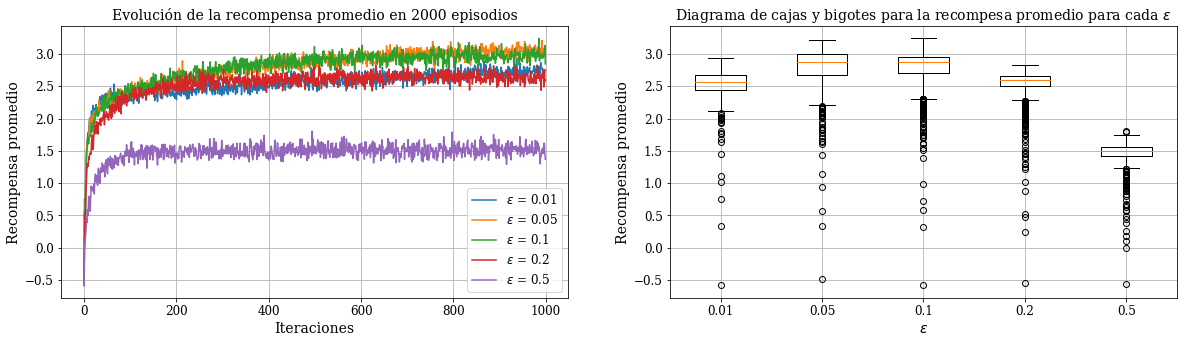

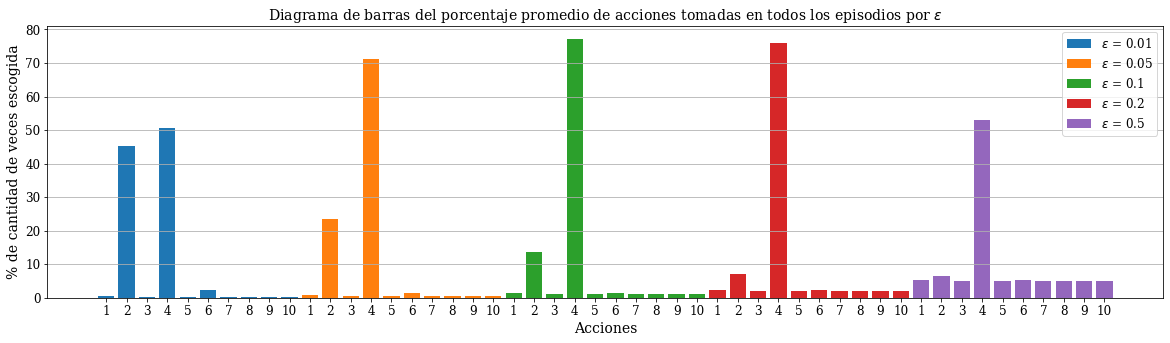

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
rewardsByEpsilon = {}
countActionsByEspsilon = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for epsilon in epsilons:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = eGreedyMethod(epsilon, banditEnvs, 1, numberSteps, 
                                                numberEpisodics, numberActions)
  rewardsByEpsilon[epsilon] = rewardsMean
  countActionsByEspsilon[epsilon] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$\epsilon$ = {epsilon}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByEpsilon.keys(), rewardsByEpsilon.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\epsilon$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for epsilon in epsilons:
  plt.bar(actionsAvaliable + space, countActionsByEspsilon[epsilon], label = f'$\epsilon$ = {epsilon}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Los resultados de implementar el método $ϵ$-greedy en configuración estática y con variación del hiper-parámetro $\epsilon$ indican que con $\epsilon = 0.1$ se logra un buen rendimiento, con un valor promedio de recompensa cercano a $3.0$. En el diagrama de cajas y bigotes se puede observar que para esta configuración se logra una distribución más uniforme de la recompensa promedio, además el diagrama de barras indica que la acción 4, la cual se interpretaría como la mejor, es cercana al $80%$ de las veces que es escogida.  En cuanto a las iteraciones se observa que a partir de 200 la respuesta del algoritmo tiende a estabilizarse para $\epsilon = 0.5$, en los demás casos se observa una convergencia desde la iteración 600.   

* **Implementación No Estática** 

<p align="justify">
En la implementación no estática se debe establecer el factor $\alpha$ para los estimativos $q$. En el siguiente código se proponen combinaciones de valores para $\epsilon$ y $\alpha$, luego se trazan mapas de calor, uno con el promedio de recompensas en los episodios en todas las iteraciones para cada par $(\epsilon, \alpha)$ y otro con los valores de desviación estándar.

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
alphas = [0.1, 0.3, 0.5, 0.7, 0.8] # Valores para el hiper-parámetro alpha

meanRewardEpsilonAlpha = np.empty((5, 5))
stdRewardEpsilonAlpha = np.empty((5, 5))

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    rewardsMean, _ = eGreedyMethod(epsilon, banditEnvs, 1, numberSteps, 
                                                  numberEpisodics, numberActions, 
                                                  estaticFactor = alpha)
    meanRewardEpsilonAlpha[i][j] = np.mean(rewardsMean)
    stdRewardEpsilonAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1 

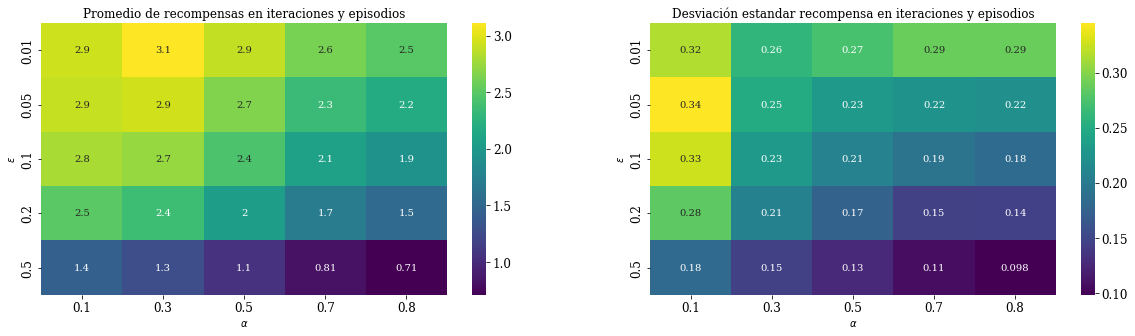

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(meanRewardEpsilonAlpha, cmap='viridis', ax = ax[0], annot = True)
sns.heatmap(stdRewardEpsilonAlpha, cmap='viridis', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')
plt.show()

<p align="justify">
Los mapas de calor sugieren un valor $\alpha = 0.3$ y $\epsilon = 0.01$, estos valores alcanzan un promedio de recompensas en 1000 iteraciones y 2000 episodios de 3.1, además la desviación estándar en  la cadenas de recompensas promedio por episodios logra un valor de 0.27, el cual no es el menor en la matriz de combinación de hiper-parámetros, pero no es un valor representativamente alto. Fijado $\alpha$ se realiza una búsqueda más fina del hiper-parámetro $\epsilon$, alrededor de 0.01.

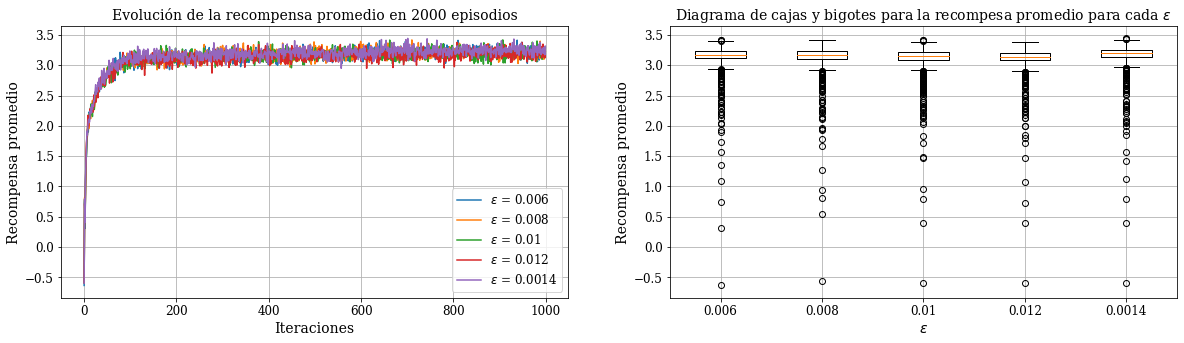

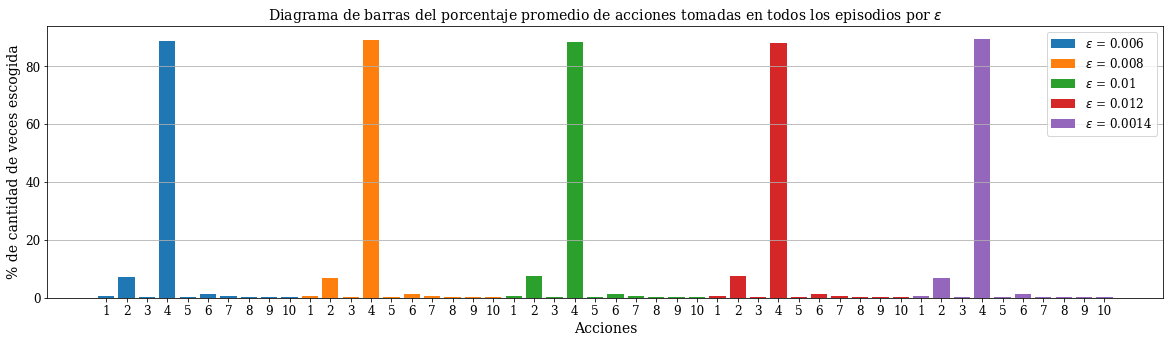

In [ ]:
epsilons = [0.006, 0.008, 0.01, 0.012, 0.0014] # Valores para el hiper-parámetro epsilon

rewardsByEpsilon = {}
countActionsByEspsilon = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for epsilon in epsilons:
  rewardsMean, meanCountActions = eGreedyMethod(epsilon, banditEnvs, 1, numberSteps, 
                                                numberEpisodics, numberActions, 
                                                estaticFactor = 0.3)
  rewardsByEpsilon[epsilon] = rewardsMean
  countActionsByEspsilon[epsilon] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'$\epsilon$ = {epsilon}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByEpsilon.keys(), rewardsByEpsilon.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\epsilon$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for epsilon in epsilons:
  plt.bar(actionsAvaliable + space, countActionsByEspsilon[epsilon], label = f'$\epsilon$ = {epsilon}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Los resultados de la sintonización fina y parámetro $\alpha = 0.3$ indican  convergencia desde las primeras iteraciones. Para todas las variaciones finas del hiper-parámetro $\epsilon$ se logra un promedio de recompensa superior a $3.0$ y se puede observar en el diagrama de cajas y bigotes una distribución de los datos más concentrada, lo que refleja más consistencia en las recompensas observadas. Esto se refuerza por las gráficas de barras donde se observa que se escoge en promedio la acción 4 por encima del $80\%$ de las veces.

## Método 2. 

* **Implementación estática**

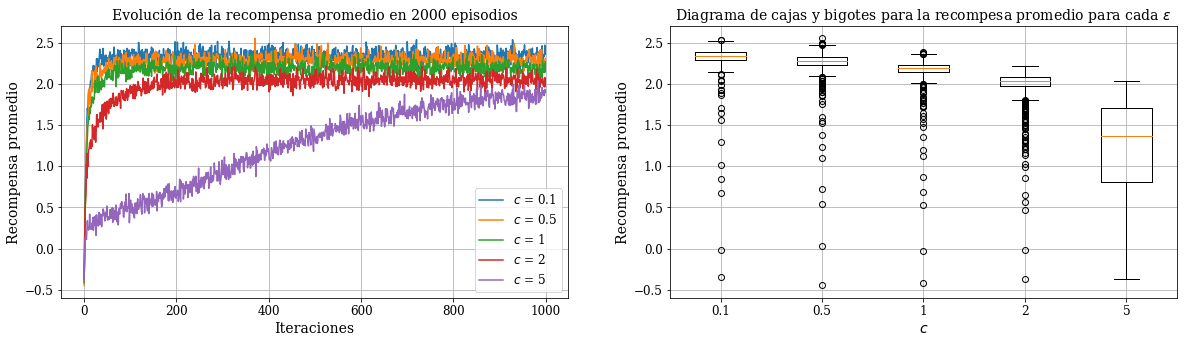

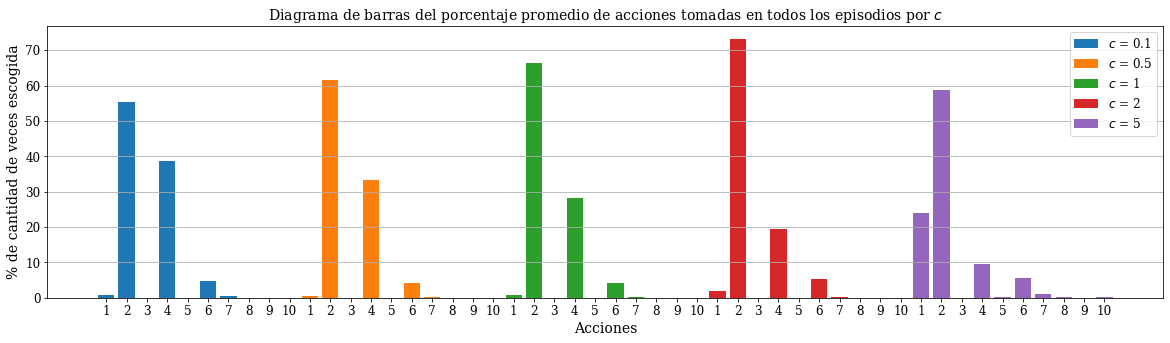

In [ ]:
Cs = [0.1, 0.5, 1, 2, 5] # Valores para el hiper-parámetro c
rewardsByC = {}
countActionsByC = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for c in Cs:
  # Evaluación del método para los diferentes valores de c
  # Método configurado en comportamiento no estático 
  rewardsMean, meanCountActions = UCBMethod(c, banditEnvs, 1, numberSteps, 
                                                numberEpisodics, numberActions)
  rewardsByC[c] = rewardsMean
  countActionsByC[c] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$c$ = {c}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByC.keys(), rewardsByC.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$c$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for c in Cs:
  plt.bar(actionsAvaliable + space, countActionsByC[c], label = f'$c$ = {c}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $c$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Los resultados de la implementación de este método indican que el valor promedio de la recompensa se ubica por debajo de $2.5$. El algoritmo para los valores de $c \not = 5$ se estabiliza rápidamente incluso antes de las primeras 200 iteraciones. Para el caso de $c=5$ se puede observar un comportamiento creciente en la evolución de la recompensa promedio, sin embargo no se logra  estabilización. El diagrama de barras refuerza estos análisis, las acciones 2 y 4 se escogen la mayoría de veces, sin embargo de acuerdo con los resultados del método anterior la mejor acción es 4. En este algoritmo se puede observar que falta motivar la exploración, ya que se converge rápidamente pero no se encuentra el valor que podría maximizar la recompensa.

* **Implementación no estática**
<p align="justify">
De forma similar a lo planteado para el método 1 se propone analizar varios pares $(\alpha, c)$ y establecer una buena configuración, lo ideal sería buscar una configuración que maximice el valor promedio y minimice la varianza, sin embargo es aceptable un buen promedio con varianza baja, no necesariamente la mínima.  

In [ ]:
Cs = [0.1, 0.5, 1, 2, 5] # Valores para el hiper-parámetro c
alphas = [0.1, 0.3, 0.5, 0.7, 0.8] # Valores para el hiper-parámetro alpha

meanRewardCAlpha = np.empty((5, 5))
stdRewardCAlpha = np.empty((5, 5))

j = 0
for alpha in alphas:
  i = 0
  for c in Cs:
    rewardsMean, _ = UCBMethod(c, banditEnvs, 1, numberSteps, 
                                                  numberEpisodics, numberActions, 
                                                  estaticFactor = alpha)
    meanRewardCAlpha[i][j] = np.mean(rewardsMean)
    stdRewardCAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1

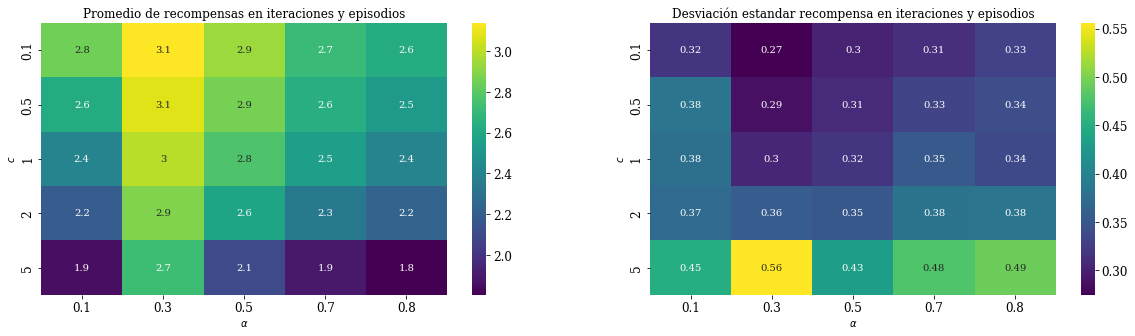

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(meanRewardCAlpha, cmap='viridis', ax = ax[0], annot = True)
sns.heatmap(stdRewardCAlpha, cmap='viridis', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(Cs)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$c$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(Cs)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$c$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')
plt.show()

<p align="justify">
Estos resultados indican que un valor de $c=0.5$ y $\alpha = 0.3$ generan el mayor promedio de recompensas a través de los episodios y además esto se logra con una baja desviación estándar. A continuación se propone realizar una sintonización fina alrededor del valor $c=0.5$, y fijando $\alpha = 0.3$.

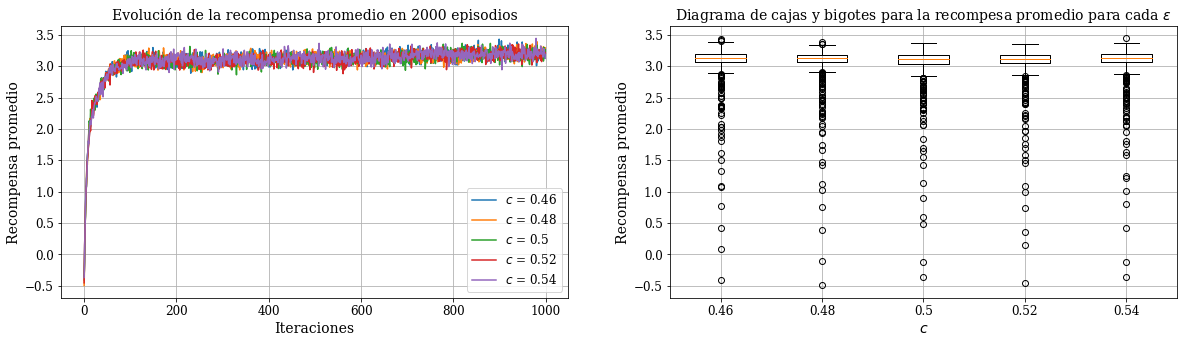

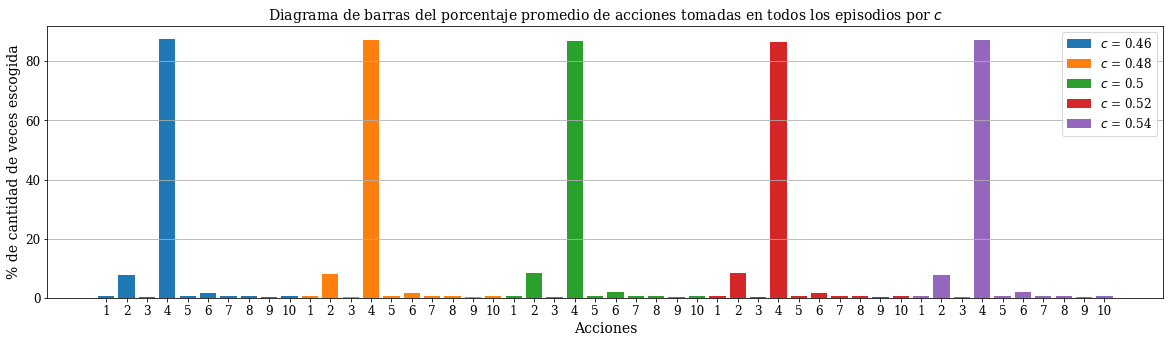

In [ ]:
Cs = [0.46, 0.48, 0.5, 0.52, 0.54] # Valores para el hiper-parámetro c
rewardsByC = {}
countActionsByC = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for c in Cs:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = UCBMethod(c, banditEnvs, 1, numberSteps, 
                                                numberEpisodics, numberActions,
                                                estaticFactor = 0.3)
  rewardsByC[c] = rewardsMean
  countActionsByC[c] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$c$ = {c}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByC.keys(), rewardsByC.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$c$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for c in Cs:
  plt.bar(actionsAvaliable + space, countActionsByC[c], label = f'$c$ = {c}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $c$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Incluir la implementación no estática mejora los resultados de este algoritmo. Con el factor $c = 0.5$ o valores cercanos, se obtiene una recompensa promedio que se estabiliza cerca de $3.0$ y manteniendo una variabilidad pequeña como se puede ver en los diagramas de cajas y bigotes. Los gráficos de barras indican que la mejor acción (4) se escoge la mayoría de las veces con un porcentaje superior al $80\%$, estos resultados son similares a lo logrado en el método anterior en configuración no estática.

## Método 3. 

Con este método se propone probar con una variación de alfas (tasa de aprendizaje) para el método Gradiet bandits y contrastar como este hyper-parámetro afecta el dilema de exploración y explotación.

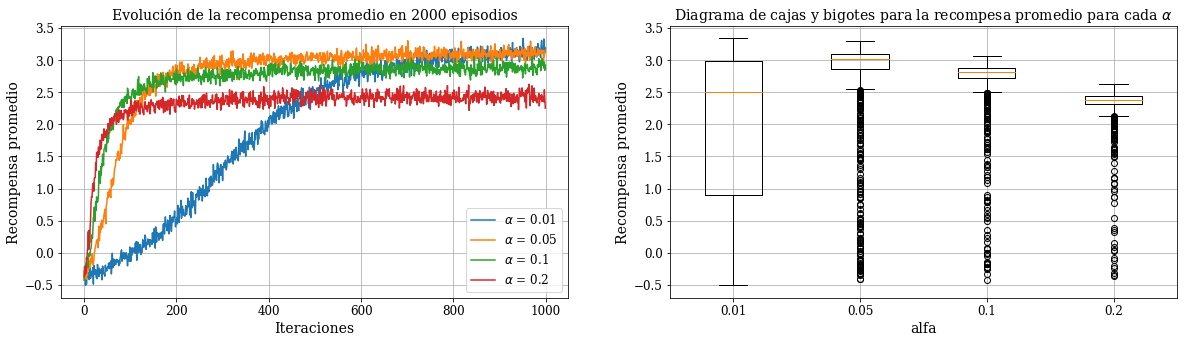

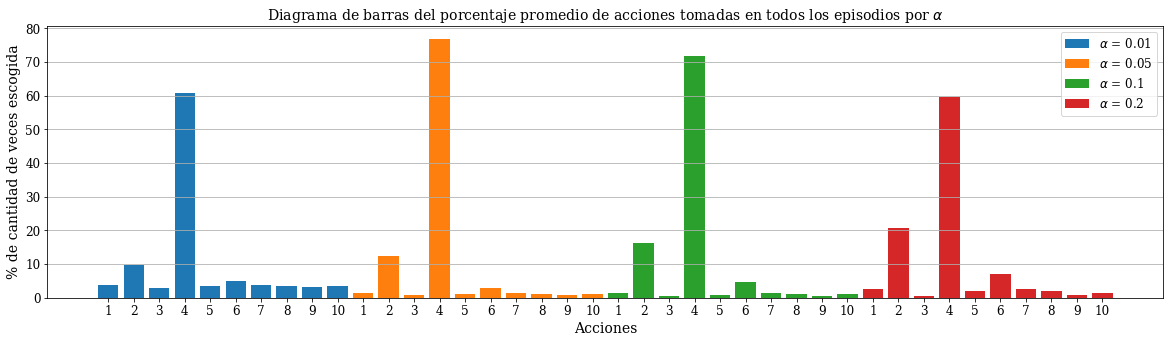

In [ ]:
alfas = [0.01, 0.05, 0.1, 0.2] # Valores para el parámetro alfa
rewardsByAlfa = {}
countActionsByAlfa = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for alfa in alfas:
  rewardsMean, meanCountActions = GradienBanditMethod(alfa, banditEnvs,1, numberSteps, numberEpisodics, numberActions)
  rewardsByAlfa[alfa] = rewardsMean
  countActionsByAlfa[alfa] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'$ \\alpha $ = {alfa}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByAlfa.keys(), rewardsByAlfa.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\\alpha$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('alfa', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(alfas)
plt.show()


# Gráfica del promedio de acciones tomadas en para todos los alphas
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for alfa in alfas:
  plt.bar(actionsAvaliable + space, countActionsByAlfa[alfa], label = f'$ \\alpha $ = {alfa}')
  space += numberActions
plt.xticks(np.arange(40), np.tile(np.arange(1,11),len(alfas)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $ \\alpha $', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Se puede concluir que con una tasa de aprendizaje ($\alpha$) menor se verá una exploración más distribuida entre las diferentes acciones, pero esto también generará un mayor retraso para llegar a la convergencia del sistema y logrará obtener la convergencia con mejores recompensas. Cabe destacar que una tasa más alta de aprendizaje reduce el tiempo de convergencia, aunque esta convergencia no siempre sea la más óptima a escoger.

## Conclusiones
<div align="justify">

*  De acuerdo con los experimentos para este escenario la mejor acción a realizar corresponde a la número 4 

*  El método $\epsilon$-greedy logró el mejor desempeño con $\epsilon = 0.1$, alcanzando una recompensa promedio que se estabiliza en aproximadamente 400 iteraciones en un valor sobre 3, en este método la opción óptima se escoge en más del 70% de las veces.

*  El método $\epsilon$-greedy no estático con los parámetros $\alpha = 0.3$ y $\epsilon = 0.001$ alcanza una recompensa promedio que se estabiliza en aproximadamente 200 iteraciones sobre el valor de 3, la mejor acción se elige el 80% de las veces. 

*  El método UCB estático logró el mejor desempeño con $c = 0.1$, en esta configuración estabilizó la evolución de la recompensa promedio aproximadamente en 200 iteraciones con valor de recompensa por debajo de 2.5, la acción 2 fue la más elegida con aproximadamente el 50% de las veces, seguida por la acción 4. 

* En la configuración no estática de UCB los mejores parámetros fueron $c = 0.5$ y $\alpha = 0.3$, con estos valores se alcanzó una recompensa promedio cercana a 3 que se estabiliza desde la iteración 200, además la mejor acción se elige por encima del 80% de las veces. 

* En el método Gradient los mejores resultados se presentan con el parámetro $\alpha = 0.05$ alcanzando una recompensa promedio que se estabiliza sobre el valor de 3 a partir de la iteración 400. La mejor acción se elige entre el 70 y 80% de las veces. 

*  De acuerdo con esta información los mejores métodos para el escenario 1 corresponden a las versiones no estáticas de $\epsilon$-greedy y UCB. En ambas implementaciones los resultados indican un buen promedio de recompensa, convergencia rápida y mayor porcentaje de veces que se selecciona la acción óptima. Sin embargo, es importante resaltar que ambos métodos requieren la configuración de dos hiper-parámetros, esto implica que para encontrar buenos resultados se deben buscar los mejores pares de valores ($\epsilon$, $\alpha$) o (c, $\alpha$) que maximicen la recompensa promedio en el horizonte de tiempo disponible. En el experimento realizado fue necesario establecer 25 posibles configuraciones para determinar los mejores parámetros. Estos mismos métodos en versión no estática o el método de Gradient sólo requieren configurar un valor, lo cual puede resultar de beneficio dependiendo de la aplicación que se aborde. También es importante mencionar que el método UCB en su configuración no estática fue el menos conveniente para este escenario, en los resultados se puede observar la tendencia a tomar acciones buenas pero no las mejores.

</div>

---
# Escenario 2. 

## Método 1. 

* **Implementación estática** 

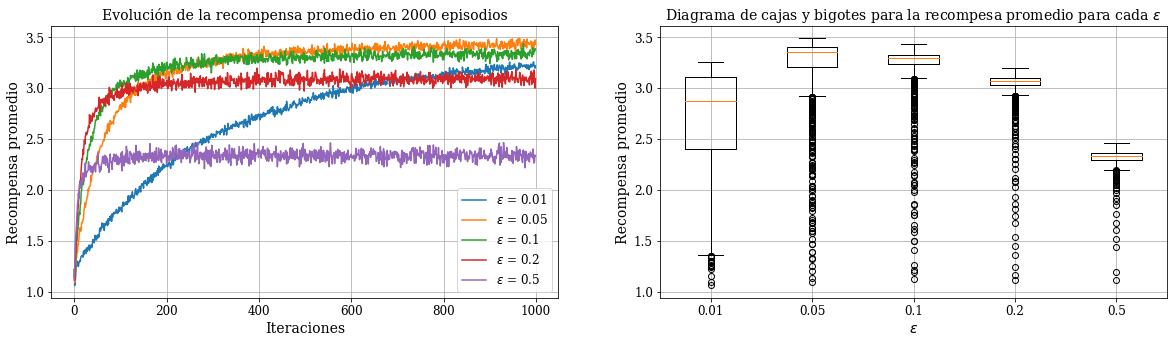

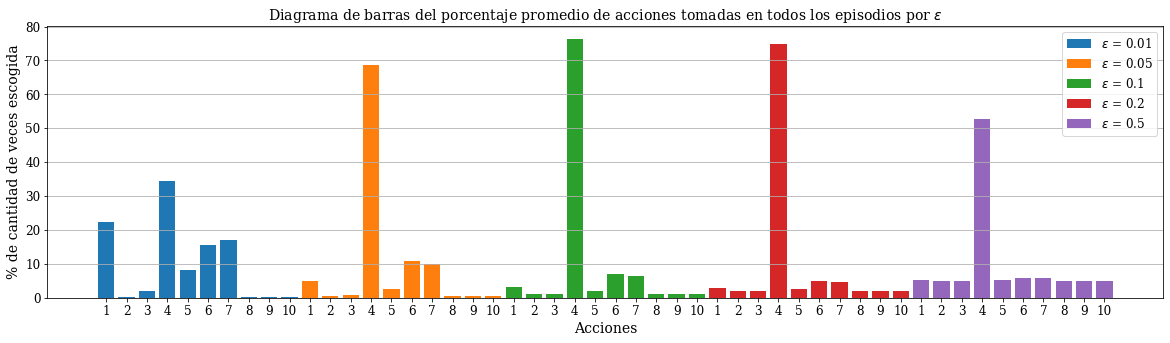

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
rewardsByEpsilon = {}
countActionsByEspsilon = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for epsilon in epsilons:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = eGreedyMethod(epsilon, banditEnvs, 2, numberSteps, 
                                                numberEpisodics, numberActions)
  rewardsByEpsilon[epsilon] = rewardsMean
  countActionsByEspsilon[epsilon] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'$\epsilon$ = {epsilon}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByEpsilon.keys(), rewardsByEpsilon.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\epsilon$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)
plt.show()


# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for epsilon in epsilons:
  plt.bar(actionsAvaliable + space, countActionsByEspsilon[epsilon], label = f'$\epsilon$ = {epsilon}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
En la implementación estática del método $\epsilon$-greedy los resultados muestran que para $\epsilon = 0.1$ se obtiene el mejor promedio de recompensa. Además, con este hiper-parámetro se logra una distribución más concentrada de la señal promedio de recompensa, como se puede observar en el diagrama de cajas y bigotes. Las gráficas de barras muestran que en este caso la acción 4 se elige más del $70\%$ de las veces. De estos resultados se puede considerar esta acción como la mejor. Para $\epsilon = 0.1$ se logra una convergencia desde la iteración 300.

* **Implementación no estática**
<p align="justify">
De forma similar al ejercicio anterior se realiza un barrido para los pares $(\epsilon, \alpha)$ y se estable la pareja de hiper-parámetros con mejor promedio sobre el promedio de recompensas en iteraciones y episodios y la mejor desviación estandar. 

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
alphas = [0.1, 0.3, 0.5, 0.7, 0.8] # Valores para el hiper-parámetro alpha

meanRewardEpsilonAlpha = np.empty((5, 5))
stdRewardEpsilonAlpha = np.empty((5, 5))

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    rewardsMean, _ = eGreedyMethod(epsilon, banditEnvs, 2, numberSteps, 
                                                  numberEpisodics, numberActions, 
                                                  estaticFactor = alpha)
    meanRewardEpsilonAlpha[i][j] = np.mean(rewardsMean)
    stdRewardEpsilonAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1 

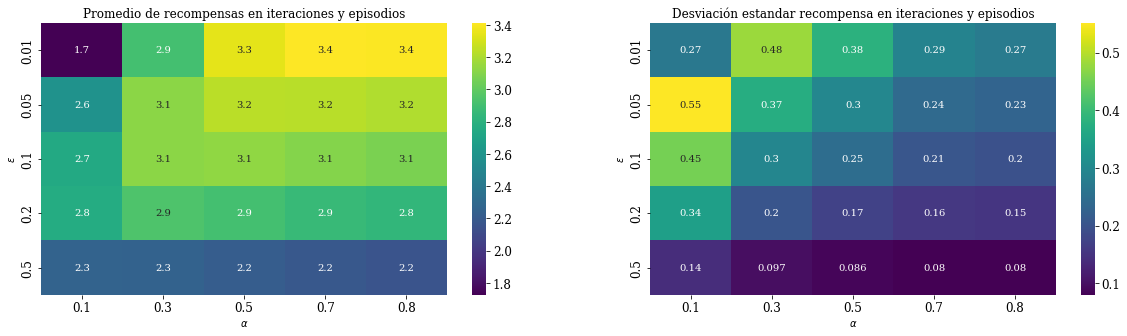

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(meanRewardEpsilonAlpha, cmap='viridis', ax = ax[0], annot = True)
sns.heatmap(stdRewardEpsilonAlpha, cmap='viridis', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')
plt.show()

<p align="justify">
Los resultados indican que para valores de $\alpha = 0.8$ y $\epsilon = 0.01$ se consigue el mejor promedio de los promedios de las recompensas en iteraciones y episodios. Para el valor de $\epsilon =0.01$ se hará una sintonización más fina, fijando $\alpha = 0.8$.

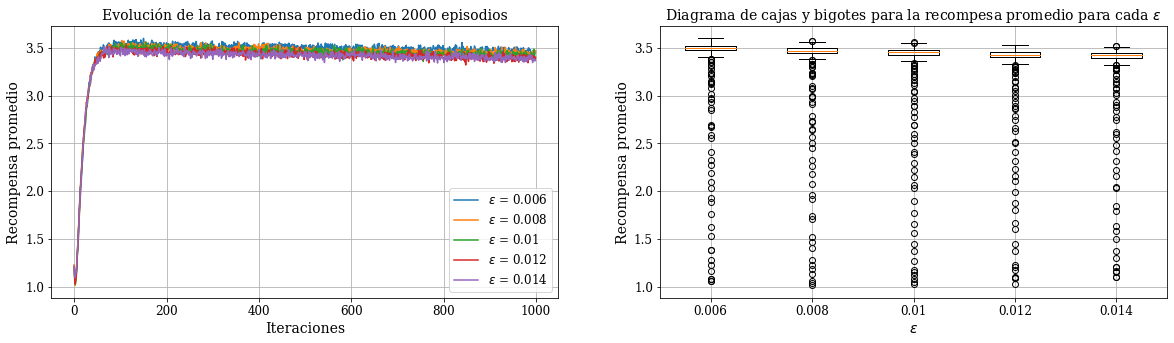

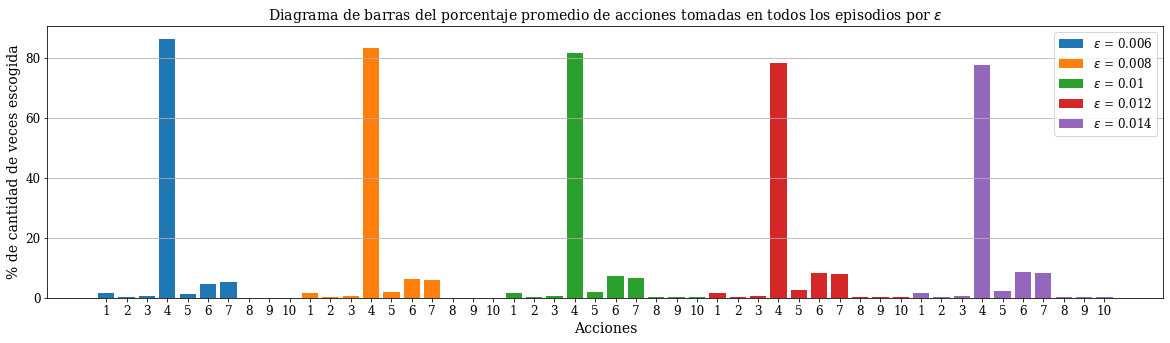

In [ ]:
epsilons = [0.006, 0.008, 0.01, 0.012, 0.014] # Valores para el hiper-parámetro epsilon
rewardsByEpsilon = {}
countActionsByEspsilon = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for epsilon in epsilons:
  rewardsMean, meanCountActions = eGreedyMethod(epsilon, banditEnvs, 2, numberSteps, 
                                                numberEpisodics, numberActions, 
                                                estaticFactor = 0.8)
  rewardsByEpsilon[epsilon] = rewardsMean
  countActionsByEspsilon[epsilon] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'$\epsilon$ = {epsilon}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByEpsilon.keys(), rewardsByEpsilon.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\epsilon$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for epsilon in epsilons:
  plt.bar(actionsAvaliable + space, countActionsByEspsilon[epsilon], label = f'$\epsilon$ = {epsilon}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
La modificación no estática del algoritmo y la sintonización de los hiper-parámetros permiten lograr mejores resultados que en la forma estática. La convergencia para valores $\epsilon = 0.01$ se alcanza en las primeras 50 iteraciones y se mantiene un promedio de recompensa sobre $3.5$ con una variabilidad pequeña, como se puede analizar en las gráficas de la evolución de la recompensa y en los diagramas de cajas y bigotes. Las barras muestran que la mejor acción (4) se elige la mayoría de las veces superando el $80\%$.

## Método 2. 

* **Implementación Estática**

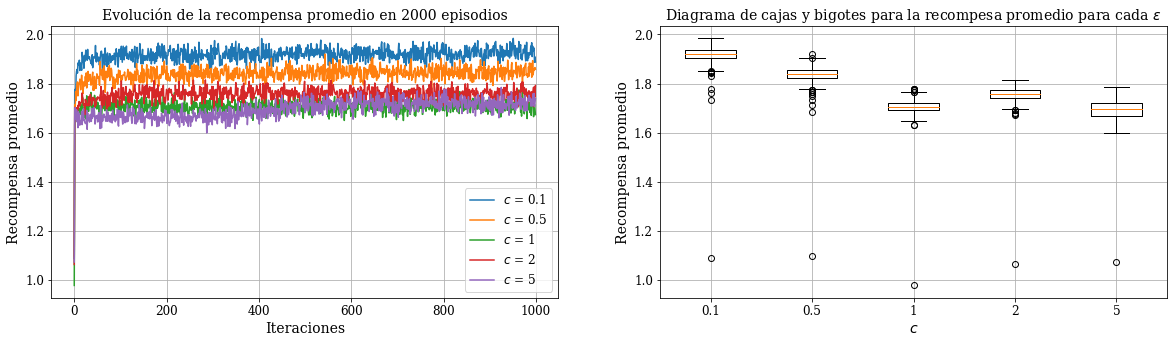

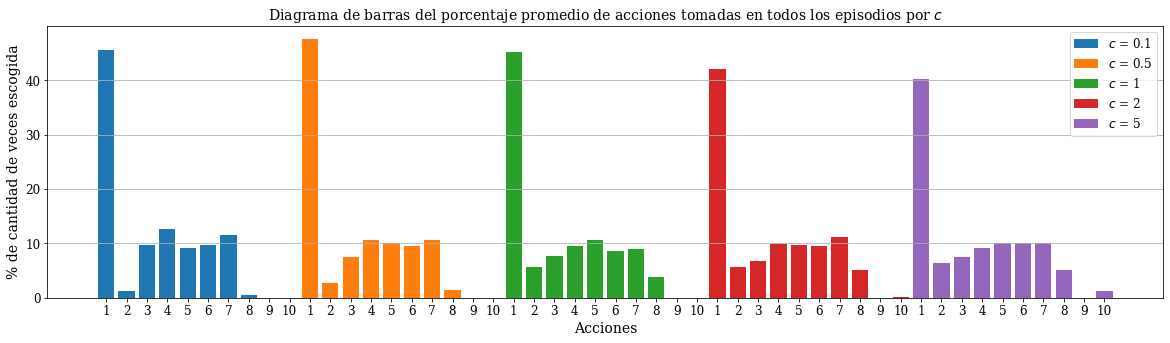

In [ ]:
Cs = [0.1, 0.5, 1, 2, 5] # Valores para el hiper-parámetro c
rewardsByC = {}
countActionsByC = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for c in Cs:
  # Evaluación del método para los diferentes valores de c
  # Método configurado en comportamiento no estático 
  rewardsMean, meanCountActions = UCBMethod(c, banditEnvs, 2, numberSteps, 
                                                numberEpisodics, numberActions)
  rewardsByC[c] = rewardsMean
  countActionsByC[c] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$c$ = {c}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByC.keys(), rewardsByC.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$c$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for c in Cs:
  plt.bar(actionsAvaliable + space, countActionsByC[c], label = f'$c$ = {c}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $c$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Este método converge rápidamente al valor promedio por debajo de $2.0$, como se observó en el método anterior se puede lograr recompensas con valor promedio de $3.4$, por lo tanto se puede concluir que se converge a una acción que no es la óptima. El diagrama de barras muestra que la acción que más se toma (1) se elige por debajo del $40\%$ de las veces. 

* **Implementación no estática**
<p align="justify">
De forma similar a lo planteado para el método 1 se propone analizar varios pares $(\alpha, c)$ y establecer una buena configuración, lo ideal sería buscar una configuración que maximice el valor promedio y minimice la varianza, sin embargo es aceptable un buen promedio con varianza baja, no necesariamente la mínima.  


In [ ]:
Cs = [0.1, 0.5, 1, 2, 5] # Valores para el hiper-parámetro c
alphas = [0.1, 0.3, 0.5, 0.7, 0.8] # Valores para el hiper-parámetro alpha

meanRewardCAlpha = np.empty((5, 5))
stdRewardCAlpha = np.empty((5, 5))

j = 0
for alpha in alphas:
  i = 0
  for c in Cs:
    rewardsMean, _ = UCBMethod(c, banditEnvs, 2, numberSteps, 
                                                  numberEpisodics, numberActions, 
                                                  estaticFactor = alpha)
    meanRewardCAlpha[i][j] = np.mean(rewardsMean)
    stdRewardCAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1

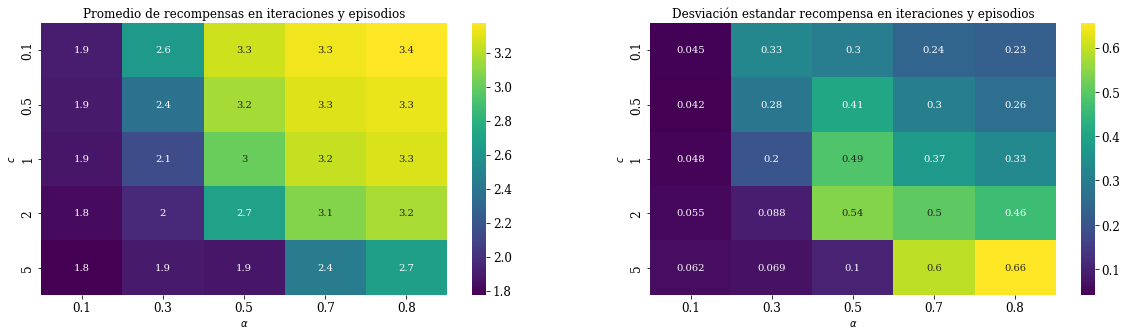

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(meanRewardCAlpha, cmap='viridis', ax = ax[0], annot = True)
sns.heatmap(stdRewardCAlpha, cmap='viridis', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(Cs)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$c$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(Cs)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$c$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')
plt.show()

<p align="justify">
Para este escenario los resultados indican que una buena combinación de pares $\alpha, c$ ocurre para los valores $\alpha = 0.8$ y $c= 0.1$ en los cuales se alcanza el mayor promedio de recompensas promedios con una desviación estándar pequeña. A continuación se realiza una sintonización más fina alrededor del valor de $c=0.1$ con $\alpha = 0.8$ fijo. 

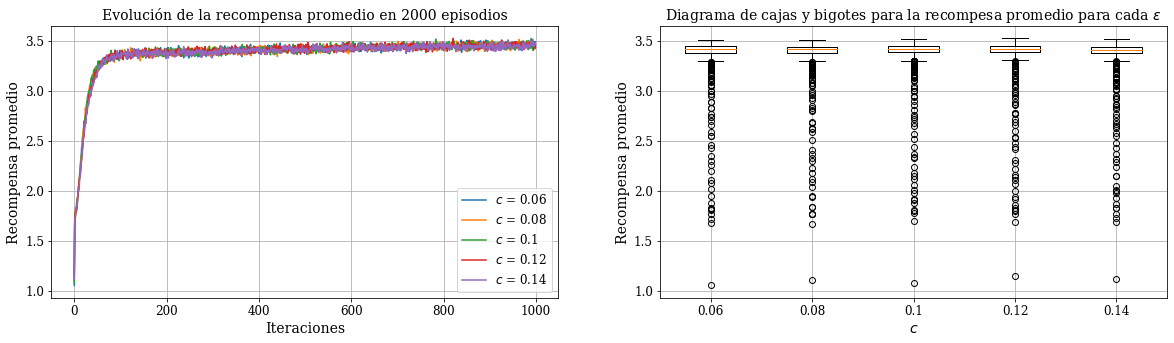

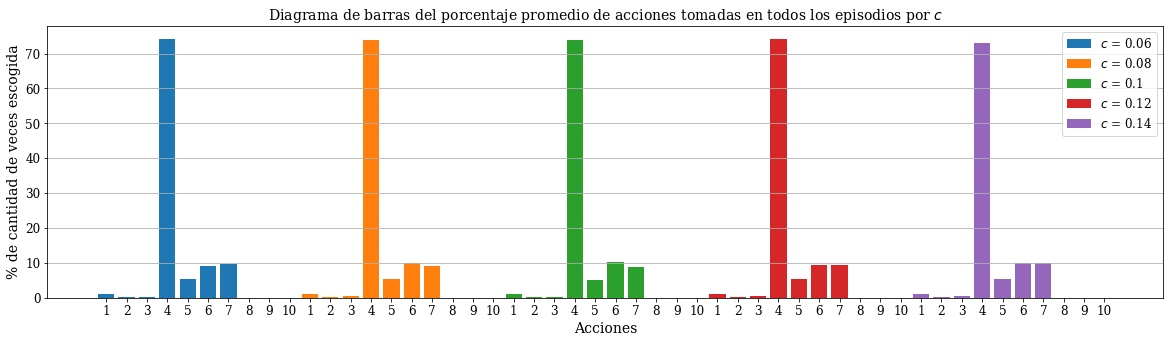

In [ ]:
Cs = [0.06, 0.08, 0.1, 0.12, 0.14] # Valores para el hiper-parámetro c
rewardsByC = {}
countActionsByC = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for c in Cs:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = UCBMethod(c, banditEnvs, 2, numberSteps, 
                                                numberEpisodics, numberActions,
                                                estaticFactor = 0.8)
  rewardsByC[c] = rewardsMean
  countActionsByC[c] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$c$ = {c}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByC.keys(), rewardsByC.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$c$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for c in Cs:
  plt.bar(actionsAvaliable + space, countActionsByC[c], label = f'$c$ = {c}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $c$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
La implementación no estática mejora los resultados previamente logrados en la versión estática, en este caso se observa que la mejor acción resulta ser la número 4 y se obtiene una recompensa promedio de $3.5$ la cual se alcanza desde la iteración 100. Además en el diagrama de cajas y bigotes se puede verificar que la señal de la evolución promedio de la recompensa logra valores concentrados con baja variabilidad. Los diagramas de barras muestran que la mejor acción se elige por encima del $70\%$ de las veces.   

## Método 3. 

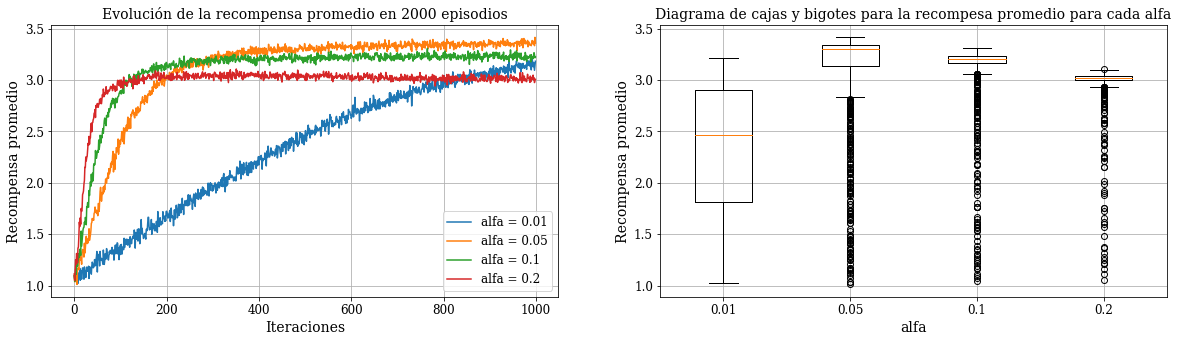

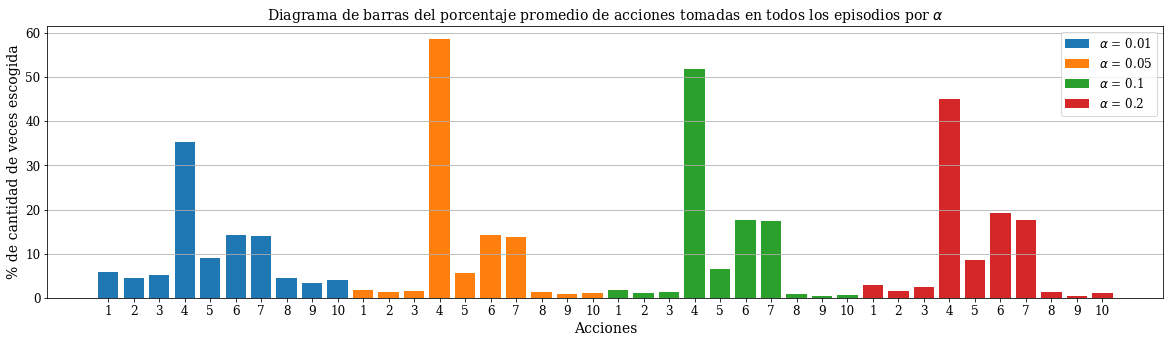

In [ ]:
alfas = [0.01, 0.05, 0.1, 0.2] # Valores para el parámetro alfa
rewardsByAlfa = {}
countActionsByAlfa = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for alfa in alfas:
  rewardsMean, meanCountActions = GradienBanditMethod(alfa, banditEnvs,2, numberSteps, numberEpisodics, numberActions)
  rewardsByAlfa[alfa] = rewardsMean
  countActionsByAlfa[alfa] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'alfa = {alfa}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByAlfa.keys(), rewardsByAlfa.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada alfa', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('alfa', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(alfas)
plt.show()


# Gráfica del promedio de acciones tomadas en para todos los alphas
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for alfa in alfas:
  plt.bar(actionsAvaliable + space, countActionsByAlfa[alfa], label = f'$ \\alpha $ = {alfa}')
  space += numberActions
plt.xticks(np.arange(40), np.tile(np.arange(1,11),len(alfas)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $ \\alpha $', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

Para esta implementación se puede ver como el caso ($\alpha =0.01$) al intentar explorar no logra en el mismo tiempo (1000 iteraciones) conseguir la convergencia, aunque también de puede ver que con una tasa de aprendizaje más alta ($\alpha =0.2$) la convergencia no es la óptima que maximiza las recompensas. Para este caso la mejor ($\alpha =0.05$) logra una cantidad de exploración y explotación tal que consigue la convergencia óptima en un tiempo récord.

## Conclusiones
<div align="justify">

*  De acuerdo con los experimentos para este escenario la mejor acción a realizar corresponde a la número 4 

*  El método $\epsilon$-greedy logró el mejor desempeño con $\epsilon = 0.1$, alcanzando una recompensa promedio que se estabiliza en aproximadamente 250 iteraciones en un cercano a 3.5, en este método la opción óptima se escoge en más del 70% de las veces.

*  El método $\epsilon$-greedy no estático con los parámetros $\alpha = 0.8$ y $\epsilon = 0.001$ alcanza una recompensa promedio que se estabiliza en aproximadamente 50 iteraciones sobre el valor de 3.5, la mejor acción se elige más del 80% de las veces. 

*  El método UCB estático logró el mejor desempeño con $c = 0.1$, en esta configuración estabilizó la evolución de la recompensa promedio en las primeras iteraciones, sin embargo el valor de recompensa quedó por debajo de 2, la acción 1 fue la más elegida con aproximadamente el 50% de las veces.

* En la configuración no estática de UCB los mejores parámetros fueron $c = 0.1$ y $\alpha = 0.8$, con estos valores se alcanzó una recompensa promedio cercana a 3.5 que se estabiliza desde la iteración 100, además la mejor acción se elige por encima del 70% de las veces. 

* En el método Gradient los mejores resultados se presentan con el parámetro $\alpha = 0.05$ alcanzando una recompensa promedio que se estabiliza sobre el valor de 3.5 a partir de la iteración 400. La mejor acción se elige cerca del 60% de las veces. 

*  De acuerdo con esta información los mejores métodos para el escenario 2 corresponde a la versión no estáticas de $\epsilon$-greedy. En esta implementación los resultados indican un buen promedio de recompensa, convergencia rápida y mayor porcentaje de veces que se selecciona la acción óptima. Sin embargo, es importante resaltar que este método requiere la configuración de dos hiper-parámetros, ($\epsilon$, $\alpha$) por lo que es necesario realizar una sintonización ensayando varios valores. En el experimento realizado fue necesario establecer 25 posibles configuraciones para determinar los mejores parámetros. El método UCB en su configuración no estática fue el menos conveniente para este escenario, igual que en el escenario anterior, en los resultados se puede observar la tendencia a tomar acciones buenas pero no las mejores.

</div>


---
# Escenario 3. 

## Método 1. 

* **Implementación Estática**

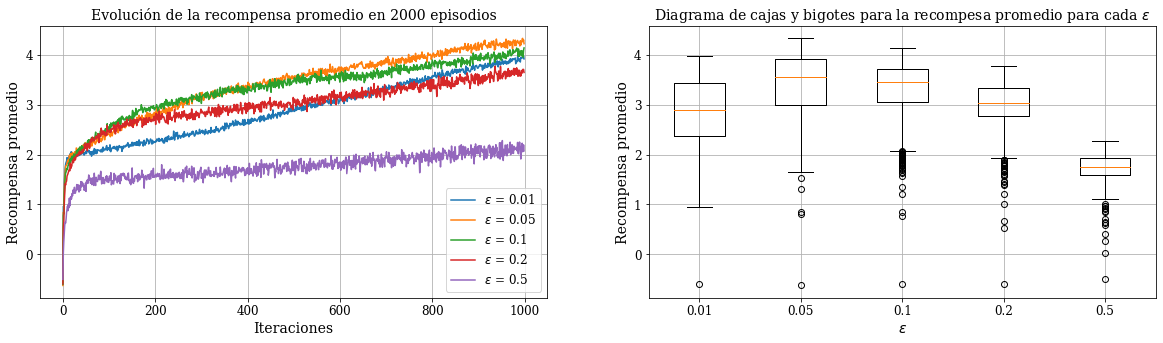

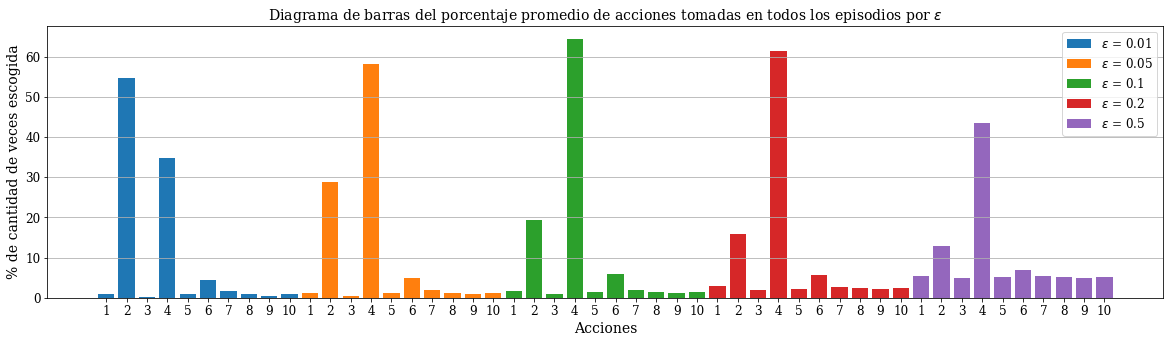

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
rewardsByEpsilon = {}
countActionsByEspsilon = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for epsilon in epsilons:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = eGreedyMethod(epsilon, banditEnvs, 3, numberSteps, 
                                                numberEpisodics, numberActions)
  rewardsByEpsilon[epsilon] = rewardsMean
  countActionsByEspsilon[epsilon] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'$\epsilon$ = {epsilon}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByEpsilon.keys(), rewardsByEpsilon.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\epsilon$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)
plt.show()

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for epsilon in epsilons:
  plt.bar(actionsAvaliable + space, countActionsByEspsilon[epsilon], label = f'$\epsilon$ = {epsilon}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Los resultados para este método indican que la señal de la recompensa promedio tiene un comportamiento creciente sin estabilizarse cerca de algún valor. Para el parámetro $\epsilon = 0.01$ se alcanza el mayor promedio de recompensa promedio, para este hiper-parámetro la recompensa promedio se mantiene entre los valores de 2 y 4 según indica el diagrama de cajas y bigotes. El valor de $\epsilon = 0.5$ es el menos conveniente logrando un promedio cercano a 2. De los diagramas de barras se puede concluir que la mejor acción es la número 4, en el caso de $\epsilon = 0.5$ el algoritmo prefiere la acción 2 la mayoría de veces. Con $\epsilon = 0.001$ la acción 4 se prefiere un 60% de las veces.

* **Implementación no estática**
<p align="justify">
Similar al proceso realizado en los escenarios previos se realiza la busqueda de los mejores hiper-parámetros $\epsilon$ y $\alpha$. 

In [ ]:
epsilons = [0.01, 0.05, 0.1, 0.2, 0.5] # Valores para el hiper-parámetro epsilon
alphas = [0.1, 0.3, 0.5, 0.7, 0.8] # Valores para el hiper-parámetro alpha

meanRewardEpsilonAlpha = np.empty((5, 5))
stdRewardEpsilonAlpha = np.empty((5, 5))

j = 0
for alpha in alphas:
  i = 0
  for epsilon in epsilons:
    rewardsMean, _ = eGreedyMethod(epsilon, banditEnvs, 3, numberSteps, 
                                                  numberEpisodics, numberActions, 
                                                  estaticFactor = alpha)
    meanRewardEpsilonAlpha[i][j] = np.mean(rewardsMean)
    stdRewardEpsilonAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1

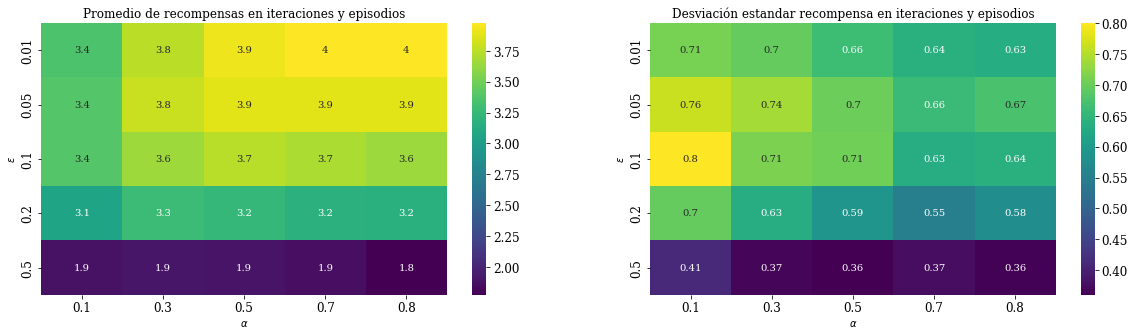

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(meanRewardEpsilonAlpha, cmap='viridis', ax = ax[0], annot = True)
sns.heatmap(stdRewardEpsilonAlpha, cmap='viridis', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(epsilons)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$\epsilon$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(epsilons)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$\epsilon$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')
plt.show()

<p align="justify">
Los resultados presentados en el mapa de calor indican que para los hiper-parámetros $\alpha = 0.8$, $\epsilon = 0.01$ generan el mayor promedio del promedio de las recompensas en iteraciones y episodios, además en esta configuración se logra una desviación estándar no muy elevada. A continuación se realiza una sintonización más fina alrededor del valor $\epsilon$ fijando $\alpha = 0.8$.

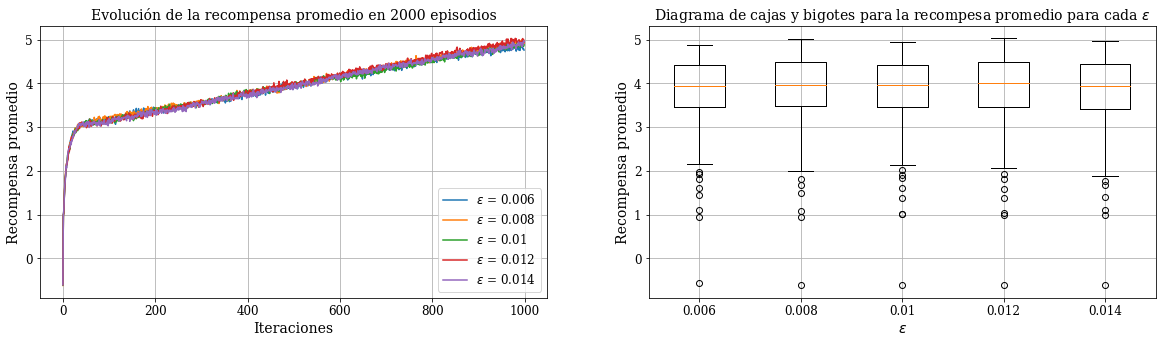

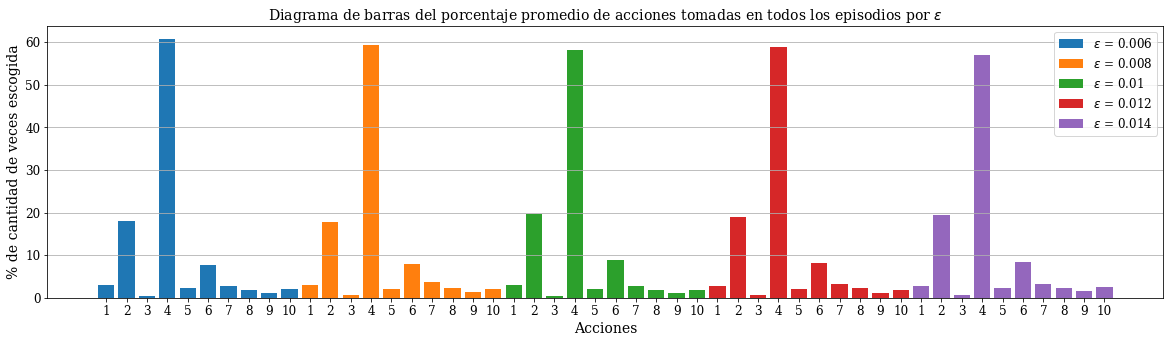

In [ ]:
epsilons = [0.006, 0.008, 0.01, 0.012, 0.014] # Valores para el hiper-parámetro epsilon
rewardsByEpsilon = {}
countActionsByEspsilon = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for epsilon in epsilons:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = eGreedyMethod(epsilon, banditEnvs, 3, numberSteps, 
                                                numberEpisodics, numberActions, 
                                                estaticFactor = 0.8)
  rewardsByEpsilon[epsilon] = rewardsMean
  countActionsByEspsilon[epsilon] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'$\epsilon$ = {epsilon}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByEpsilon.keys(), rewardsByEpsilon.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$\epsilon$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)
plt.show()

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for epsilon in epsilons:
  plt.bar(actionsAvaliable + space, countActionsByEspsilon[epsilon], label = f'$\epsilon$ = {epsilon}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $\epsilon$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Con la modificación no estática el algoritmo mejora el valor promedio de recompensa, igual que en el caso anterior se observa que la señal de recompensas promedio tiene una tendencia incremental sin lograr estabilizarse sobre un valor. La distribución de los datos de la señal de evolución de la recompensa promedio se ubica, en su mayoría, entre 3 y 5. A diferencia del método estático se observa que pese a que la acción más elegida (4) es inferior al 60% la recompensa es mayor que en el caso anterior. Esto puede señalar que en este escenario no hay una opción óptima fija, de existir y ser la (4) los resultados del anterior método deberían ser superiores al elegir la mayoría de las veces esta acción.

## Método 2.

* **Implementación Estática**

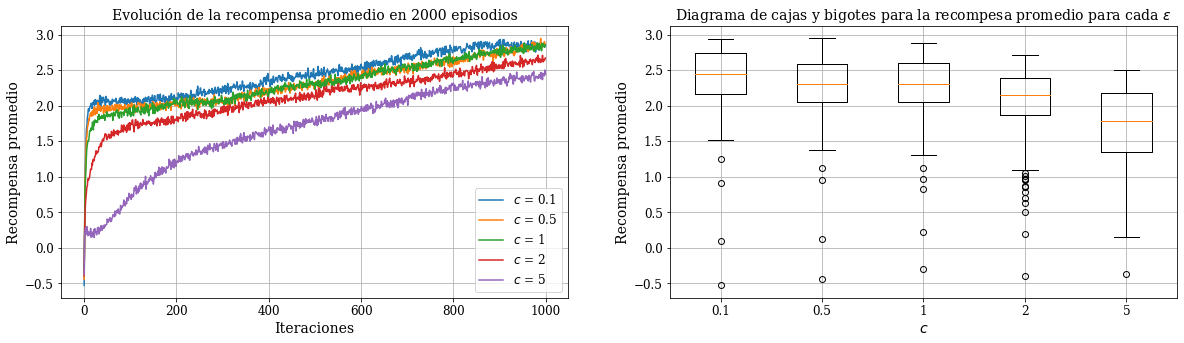

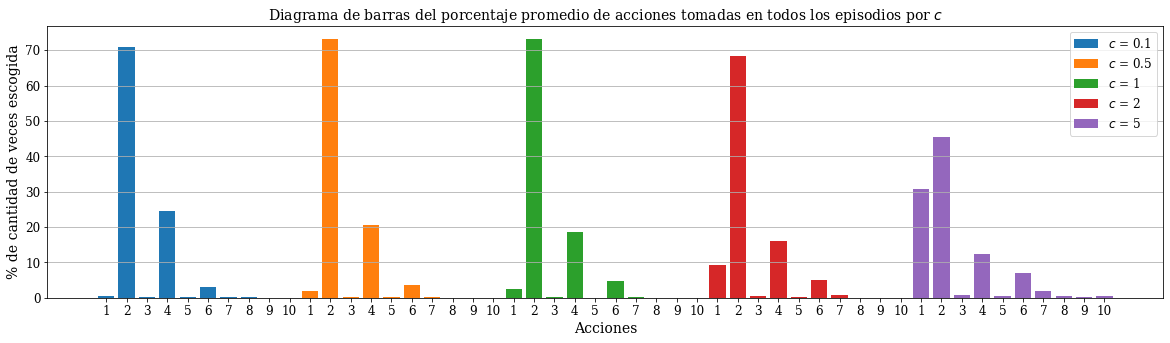

In [ ]:
Cs = [0.1, 0.5, 1, 2, 5] # Valores para el hiper-parámetro c
rewardsByC = {}
countActionsByC = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for c in Cs:
  # Evaluación del método para los diferentes valores de c
  # Método configurado en comportamiento no estático 
  rewardsMean, meanCountActions = UCBMethod(c, banditEnvs, 3, numberSteps, 
                                                numberEpisodics, numberActions)
  rewardsByC[c] = rewardsMean
  countActionsByC[c] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$c$ = {c}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByC.keys(), rewardsByC.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$c$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for c in Cs:
  plt.bar(actionsAvaliable + space, countActionsByC[c], label = f'$c$ = {c}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $c$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
En el método UCB se observa una tendencia similar a los resultados de $\epsilon$-greedy. Las curvas de la evolución de la recompensa promedio tienden a tener carácter incremental sin llegar a estabilizarse cerca de algún valor. Sin embargo, la recompensa alcanzada en este método es inferior a la lograda con el método anterior con valores por debajo de 3. Las gráficas de barras indican que la opción que se eligió con mayor frecuencia fue la 2, a diferencia del método anterior en el cual la opción 4 era elegida la mayoría de las veces. Asumiendo que la opción 4 es la óptima, este algoritmo elige una opción que no es la mejor, en consecuencia logra menores valores de recompensa.

* **Implementación no estática**

In [ ]:
Cs = [0.1, 0.5, 1, 2, 5] # Valores para el hiper-parámetro c
alphas = [0.1, 0.3, 0.5, 0.7, 0.8] # Valores para el hiper-parámetro alpha

meanRewardCAlpha = np.empty((5, 5))
stdRewardCAlpha = np.empty((5, 5))

j = 0
for alpha in alphas:
  i = 0
  for c in Cs:
    rewardsMean, _ = UCBMethod(c, banditEnvs, 3, numberSteps, 
                                                  numberEpisodics, numberActions, 
                                                  estaticFactor = alpha)
    meanRewardCAlpha[i][j] = np.mean(rewardsMean)
    stdRewardCAlpha[i][j] = np.std(rewardsMean)
    i += 1
  j += 1

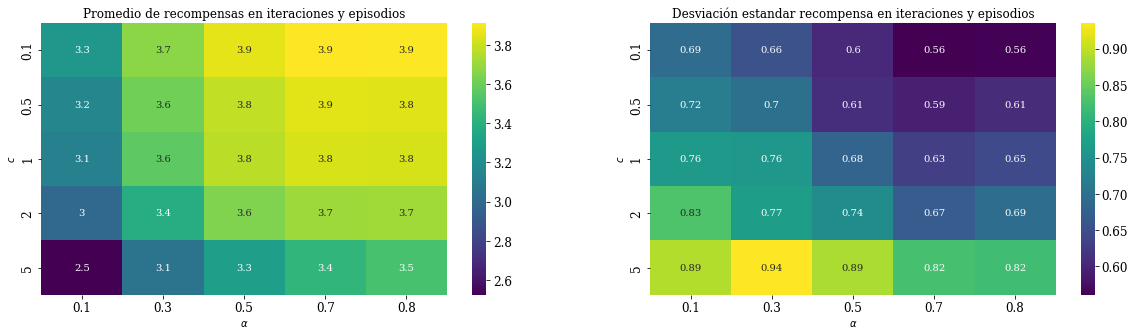

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(meanRewardCAlpha, cmap='viridis', ax = ax[0], annot = True)
sns.heatmap(stdRewardCAlpha, cmap='viridis', ax = ax[1], annot = True)

ax[0].set_xticklabels(alphas)
ax[0].set_yticklabels(Cs)
ax[0].set_xlabel('$\\alpha$')
ax[0].set_ylabel('$c$')
ax[0].set_title('Promedio de recompensas en iteraciones y episodios')

ax[1].set_xticklabels(alphas)
ax[1].set_yticklabels(Cs)
ax[1].set_xlabel('$\\alpha$')
ax[1].set_ylabel('$c$')
ax[1].set_title('Desviación estandar recompensa en iteraciones y episodios')
plt.show()

<p align="justify">
Los resultados indican que para los valores de $\alpha = 0.8$ y $c = 0.1$ se obtiene el mejor promedio del promedio de recompensas en iteraciones y para esta configuración de hiper-parámetros también se logra la mínima desviación estándar del promedio de recompensas en iteraciones. A continuación, se realiza una sintonización más fina para el valor de $c = 0.1$ fijando $\alpha = 0.8$.

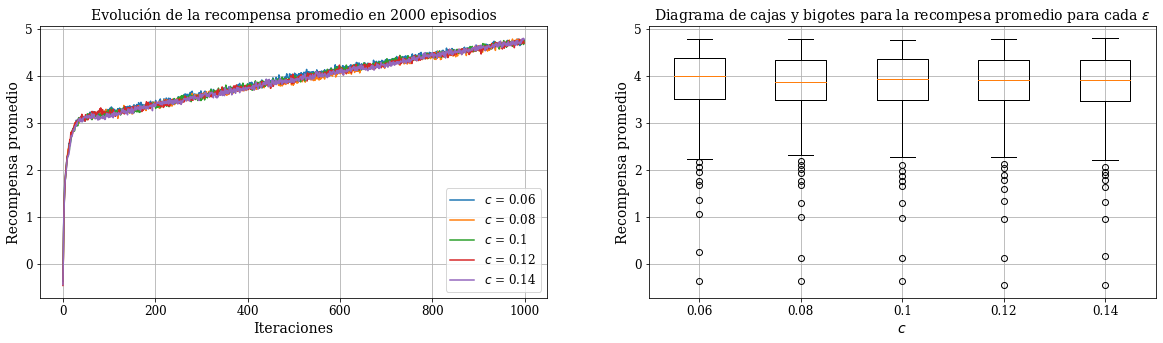

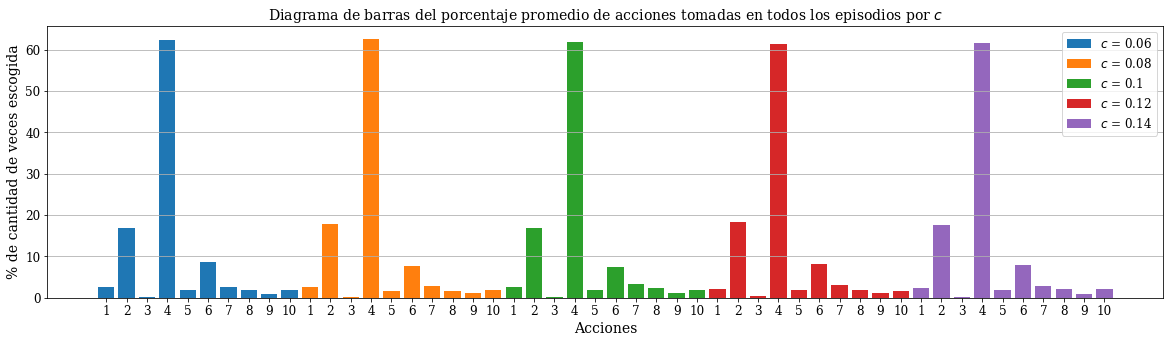

In [ ]:
Cs = [0.06, 0.08, 0.1, 0.12, 0.14] # Valores para el hiper-parámetro c
rewardsByC = {}
countActionsByC = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for c in Cs:
  # Evaluación del método para los diferentes valores de epsilon
  # Método configurado en comportamiento estático 
  rewardsMean, meanCountActions = UCBMethod(c, banditEnvs, 3, numberSteps, 
                                                numberEpisodics, numberActions,
                                                estaticFactor = 0.8)
  rewardsByC[c] = rewardsMean
  countActionsByC[c] = meanCountActions
  # Gráficas de recompensa para cada epsilon 
  ax[0].plot(rewardsMean, label=f'$c$ = {c}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByC.keys(), rewardsByC.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada $\epsilon$', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('$c$', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(epsilons)

# Gráfica del promedio de acciones tomadas en todos los métodos
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for c in Cs:
  plt.bar(actionsAvaliable + space, countActionsByC[c], label = f'$c$ = {c}')
  space += numberActions
plt.xticks(np.arange(50), np.tile(np.arange(1,11),len(epsilons)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $c$', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
La versión no estática del método da como resultado una mejora en la recompensa promedio recibida. Los valores de la recompensa promedio se ubican entre 3 y 5, y esta curva tiene una tendencia incremental, sin estabilizarse en un valor determinado. Con esta modificación la acción 4 es la que más se elige, seguida por la acción 2. La no convergencia del método indica que el escenario está cambiando o que se requieren más iteraciones para estabilizar el valor de recompensa promedio.

## Metodo 3.

Metodo del algoritmo Gradient Bandits

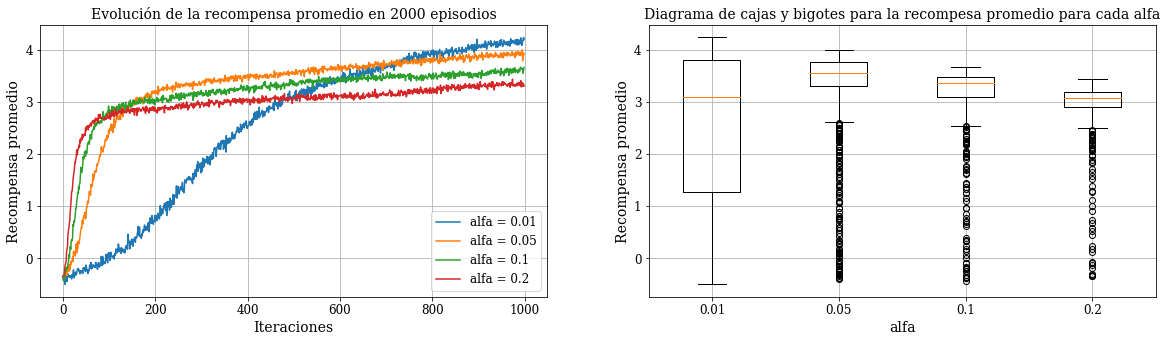

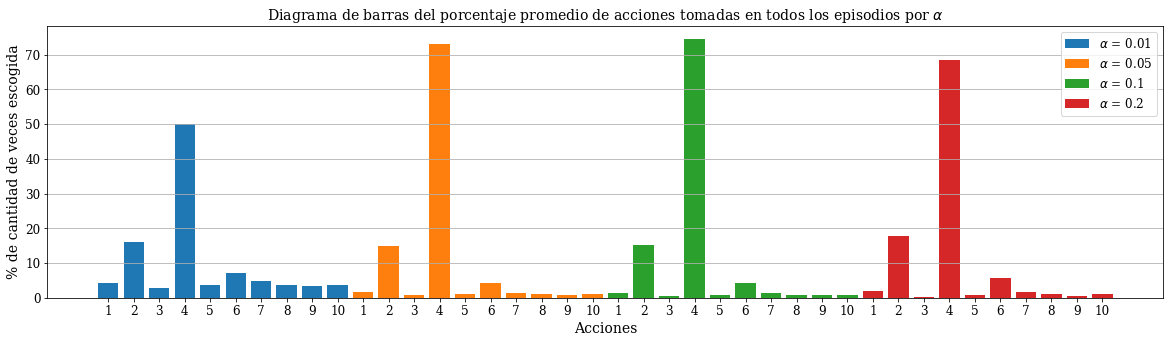

In [ ]:
alfas = [0.01, 0.05, 0.1, 0.2] # Valores para el parámetro alfa
rewardsByAlfa = {}
countActionsByAlfa = {}

fig, ax = plt.subplots(1,2, figsize=(20,5))

for alfa in alfas:
  rewardsMean, meanCountActions = GradienBanditMethod(alfa, banditEnvs,3, numberSteps, numberEpisodics, numberActions)
  rewardsByAlfa[alfa] = rewardsMean
  countActionsByAlfa[alfa] = meanCountActions
  # Gráficas y visualización de datos
  ax[0].plot(rewardsMean, label=f'alfa = {alfa}')

# Configuración aspecto de la gráfica de la evolución de la recompensa promedio    
ax[0].set_title(f'Evolución de la recompensa promedio en {numberEpisodics} episodios', fontsize = 14)
ax[0].set_ylabel('Recompensa promedio', fontsize = 14)
ax[0].set_xlabel('Iteraciones', fontsize = 14)
ax[0].legend(fontsize=12)
ax[0].grid()

# Gráfica diagráma boxplot de la recompensa promedio para cada epsilon 
epsilons, rewardsMean = rewardsByAlfa.keys(), rewardsByAlfa.values()
ax[1].boxplot(rewardsMean)
# Configuración aspecto de la gráfica boxplot
ax[1].set_title(f'Diagrama de cajas y bigotes para la recompesa promedio para cada alfa', fontsize = 14)
ax[1].set_ylabel('Recompensa promedio', fontsize = 14)
ax[1].set_xlabel('alfa', fontsize = 14)
ax[1].grid()
ax[1].set_xticklabels(alfas)
plt.show()

# Gráfica del promedio de acciones tomadas en para todos los alphas
actionsAvaliable = np.arange(numberActions)
plt.figure(figsize=(20,5))
space = 0
for alfa in alfas:
  plt.bar(actionsAvaliable + space, countActionsByAlfa[alfa], label = f'$ \\alpha $ = {alfa}')
  space += numberActions
plt.xticks(np.arange(40), np.tile(np.arange(1,11),len(alfas)))
plt.title(f'Diagrama de barras del porcentaje promedio de acciones tomadas en todos los episodios por $ \\alpha $', 
          fontsize = 14)
plt.xlabel('Acciones', fontsize = 14)
plt.ylabel('% de cantidad de veces escogida', fontsize = 14)
plt.grid(axis='y')
plt.legend(fontsize=12)
plt.show()

<p align="justify">
Al igual que en con los dos métodos anteriores se puede ver que hay una variación a lo largo de las iteraciones en cuanto a la recompensa óptima, para este caso se genera un aumento, a lo cual las variables que mejor optimizan para son las de aprendizajes menores. Se puede ver un gran cambio frente al caso anterior en donde el aprendizaje más reducido no lograba alcanzar la mayor recompensa en 1000 iteraciones, mientras que en este caso este ($\alpha =0.01$) logra superar a los demás

## Conclusiones

<div align="justify">

* De acuerdo con los experimentos para este escenario la mejor acción a realizar corresponde a la número 4, sin embargo, ningún algoritmo logra estabilizarse esto indica que estamos ante un escenario variable o que se requiere un número mayor de iteraciones para lograr convergencia. 

* Para el método $\epsilon$-greedy estático los mejores resultados se alcanzaron con el hiper-parámetro $\epsilon=0.01$, con este valor la mejor acción (4) se eligió un poco más que el 60% de las veces y la recompensa promedio presentó una tendencia creciente agrupando la mayoría de los valores entre 2 y 4. 

* El método $\epsilon$-greedy no estático con los parámetros $\alpha = 0.8$ y $\epsilon = 0.01$ alcanzó una recompensa promedio con tendencia creciente y la mayoría de los valores entre 3 y 5, la mejor acción (4) se elige más del 60% de las veces, seguida por la acción (2) con cerca del 20% de las veces. 

* Cabe resaltar que en caso de ser estáticos estos suelen tener un peor rendimiento que el Gradient Bandits que a pesar de sus diferentes tasas de aprendizaje supera a los métodos estáticos de $\epsilon$ -greedy y UCB.

* Para el método UCB en su configuración estática el mejor parámetro fue $C=0.1$, con este valor la recompensa promedio se ubicó entre 1.5 y 3, en este caso la acción más elegida fue la 2 con un porcentaje de elección mayor al 70%. Este método resulta el menos conveniente con valores muy por debajo de los alcanzados en los otros métodos. 

* En la configuración no estática de UCB los mejores parámetros fueron $c = 0.1$ y $\alpha = 0.8$, con estos valores se alcanzó una recompensa promedio con tendencia incremental y la mayoría de los valores en el rango de 3 a 5. La mejor acción (4) se elige aproximadamente un 60% de las veces. 

* En el método de Gradient Bandits el hiper-parámetro tasa de aprendizaje que mejores resultados arroja es $\alpha=0.01$, en esta configuración la señal de recompensa promedio alcanza un valor cercano a 4, sin embargo el método no converge rápidamente, y en las primeras iteraciones se realiza una alta exploración. La exploración también se ve reflejada en las acciones escogidas, para este caso la mejor acción (4) se elige un 50% de las veces el porcentaje restante se distribuye entre las otras acciones siendo uno de los métodos con mayor exploración. 

* En los casos con alta exploración se ve una diferencia de métodos, ya que el Gradient Bandit con $\alpha=0.01$ logra superar a sus otras tasas de aprendizajes al conseguir mejores recompensas luego de las 700 iteraciones, mientras que el $\epsilon$-greedy no logra superar los demas tasas antes de las 1000 iteraciones.

* Se puede observar que en este caso no se logró convergencia de los métodos desarrollados, por lo tanto se puede inferir que estamos ante el escenario de recompensas aleatorias que sigue una distribución de probabilidad que cambia con el tiempo. En este caso los mejores algoritmos, según sus recompensas promedio, fueron los no estáticos.
 

</div>
